In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.metrics import accuracy_score, f1_score

pd.set_option("max_columns", 999)
pd.set_option("max_rows", 999)

In [8]:
network = pd.read_csv('network_perday.csv', index_col = 'Unnamed: 0', engine='python')
label = pd.read_csv('labeled_accounts.csv', index_col = 'actor_account', engine='python')

# merge // get train and validation sets (get only the accounts labeled)

In [10]:
final = pd.merge(label, network, how='inner',  on = "actor_account")
model_data = final.copy()
final.head()

,actor_account,class,trade_go,trade_come,buy_from_shop,sell_to_shop,buy_from_personal_shop,sell_to_person,mail_go,mail_come,invite,join,revival,fight,friend_num,friend_num_change_count,login_total_day,trade_go_perday,trade_come_perday,buy_from_shop_perday,sell_to_shop_perday,buy_from_personal_shop_perday,mail_go_perday,mail_come_perday,invite_perday,join_perday,revival_perday,fight_perday
0,20000005,0,2.0,4.0,72.0,196.0,0.0,6.0,1.0,21.0,7.0,58.0,2.0,0.0,0.0,0.0,15.0,0.133333,0.266667,4.800000,13.066667,0.0,0.066667,1.400000,0.466667,3.866667,0.133333,0.000000
1,20000016,0,1.0,0.0,34.0,111.0,0.0,1.0,0.0,56.0,16.0,35.0,0.0,0.0,0.0,0.0,14.0,0.071429,0.000000,2.428571,7.928571,0.0,0.000000,4.000000,1.142857,2.500000,0.000000,0.000000
2,20000033,0,12.0,9.0,31.0,338.0,0.0,0.0,2.0,3.0,5.0,46.0,1.0,1.0,4.0,2.0,14.0,0.857143,0.642857,2.214286,24.142857,0.0,0.142857,0.214286,0.357143,3.285714,0.071429,0.071429
3,20000035,0,111.0,37.0,11.0,504.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,15.0,7.400000,2.466667,0.733333,33.600000,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
4,20000051,0,74.0,57.0,68.0,254.0,0.0,0.0,21.0,35.0,85.0,98.0,1.0,25.0,0.0,0.0,15.0,4.933333,3.800000,4.533333,16.933333,0.0,1.400000,2.333333,5.666667,6.533333,0.066667,1.666667


In [11]:
# check if there is any nan values
for i in model_data.columns:
    model_data[model_data[i] == np.nan]

# There are inf values. Change it to max value in the column
for i in model_data.columns:
    model_data.loc[model_data[i] == np.inf, i] = np.nan
    model_data.loc[np.isnan(model_data[i]), i] = max(model_data[i])

In [12]:
x = model_data.iloc[:,2:]
y = model_data.iloc[:,1]

## Correlation Cofficient 
    1. Actor_account is a dummy variable. Any variable that has a lower contribution than actor_account should be deleted
    2. Exp_repair_count a single value of 1. This should be deleted

In [13]:
for i in range(0, len(x.columns)):
    if abs(np.corrcoef(x.iloc[:,i], y)[0,1]) > abs(np.corrcoef(x.iloc[:,0], y)[0,1]):
        print(x.columns[i], np.corrcoef(x.iloc[:,i], y)[0,1])

sell_to_shop 0.2984588920147949
join -0.18702031263339156
trade_go_perday 0.2698658651064932
sell_to_shop_perday 0.42309094439787875
join_perday -0.22129588452478213


In [14]:
x = model_data.drop(['class'], axis=1)

In [15]:
x.head()

,actor_account,trade_go,trade_come,buy_from_shop,sell_to_shop,buy_from_personal_shop,sell_to_person,mail_go,mail_come,invite,join,revival,fight,friend_num,friend_num_change_count,login_total_day,trade_go_perday,trade_come_perday,buy_from_shop_perday,sell_to_shop_perday,buy_from_personal_shop_perday,mail_go_perday,mail_come_perday,invite_perday,join_perday,revival_perday,fight_perday
0,20000005.0,2.0,4.0,72.0,196.0,0.0,6.0,1.0,21.0,7.0,58.0,2.0,0.0,0.0,0.0,15.0,0.133333,0.266667,4.800000,13.066667,0.0,0.066667,1.400000,0.466667,3.866667,0.133333,0.000000
1,20000016.0,1.0,0.0,34.0,111.0,0.0,1.0,0.0,56.0,16.0,35.0,0.0,0.0,0.0,0.0,14.0,0.071429,0.000000,2.428571,7.928571,0.0,0.000000,4.000000,1.142857,2.500000,0.000000,0.000000
2,20000033.0,12.0,9.0,31.0,338.0,0.0,0.0,2.0,3.0,5.0,46.0,1.0,1.0,4.0,2.0,14.0,0.857143,0.642857,2.214286,24.142857,0.0,0.142857,0.214286,0.357143,3.285714,0.071429,0.071429
3,20000035.0,111.0,37.0,11.0,504.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,15.0,7.400000,2.466667,0.733333,33.600000,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
4,20000051.0,74.0,57.0,68.0,254.0,0.0,0.0,21.0,35.0,85.0,98.0,1.0,25.0,0.0,0.0,15.0,4.933333,3.800000,4.533333,16.933333,0.0,1.400000,2.333333,5.666667,6.533333,0.066667,1.666667


## Lasso (Model Based Feature Selection)

In [16]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import Lasso, Ridge

x_train, x_test, y_train, y_test = train_test_split(x, y, random_state=0, test_size=0.3)

lasso = Lasso().fit(x_train, y_train)

print('{:.3f}'.format(lasso.score(x_train, y_train)))
print('{:.3f}'.format(lasso.score(x_test, y_test)))

0.195
0.204


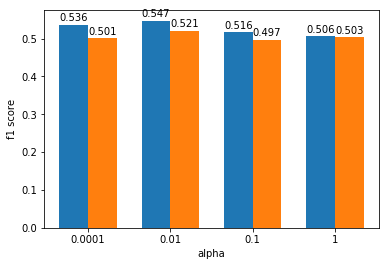

In [17]:
import matplotlib.pyplot as plt

alpha_set = [0.0001, 0.01, 0.1, 1]
max_inter_set = [10000000, 100000, 10000, 1000]

train_score = []
test_score = []
used_feature = []

for a, m in zip(alpha_set, max_inter_set):
    lasso_tr_y = lasso.predict(x_train)
    lasso_t_y = lasso.predict(x_test)
    lasso = Lasso(alpha=a, max_iter=m).fit(x_train, y_train)
    la_tr_score = np.round(f1_score((lasso.predict(x_train) > np.percentile(lasso_tr_y, 93)).astype(int), y_train), 3)
    la_te_score = np.round(f1_score((lasso.predict(x_test) > np.percentile(lasso_t_y, 93)).astype(int), y_test), 3)
    number_used = np.sum(lasso.coef_ != 0)

    train_score.append(la_tr_score)
    test_score.append(la_te_score)
    used_feature.append(number_used)

index = np.arange(len(alpha_set))
bar_width = 0.35
plt.bar(index, train_score, width=bar_width, label='train')
plt.bar(index+bar_width, test_score, width=bar_width, label='test')
plt.xticks(index+bar_width/2, alpha_set) # bar그래프 dodge를 하기 위해 기준값에 보정치를 더해줍니다.


for i, (ts, te) in enumerate(zip(train_score, test_score)):
    plt.text(i, ts+0.01, str(ts), horizontalalignment='center')
    plt.text(i+bar_width, te+0.01, str(te), horizontalalignment='center')

# plt.legend(loc=1, )
plt.xlabel('alpha')
plt.ylabel('f1 score')
plt.show()

## Results of Feature Selection by Lasso

In [18]:
# when alpha is 1

lasso = Lasso(alpha=1, max_iter=1000).fit(x_train, y_train)

lasso_tr_y = lasso.predict(x_train)
lasso_t_y = lasso.predict(x_test)

for i in range(0, len(x.columns)):
    if abs(lasso.coef_[i]) > abs(lasso.coef_[0]):
        print(x.columns[i], lasso.coef_[i])

trade_go 0.0003002315444648996
buy_from_shop 3.466892495401477e-05
sell_to_shop 4.542410595340228e-05
invite -0.00023994739251804092
join -0.00037570561668296093
sell_to_shop_perday 0.0016584133042305946


In [19]:
# when alpha is 0.1

lasso = Lasso(alpha=0.1, max_iter=10000).fit(x_train, y_train)

lasso_tr_y = lasso.predict(x_train)
lasso_t_y = lasso.predict(x_test)

for i in range(0, len(x.columns)):
    if abs(lasso.coef_[i]) > abs(lasso.coef_[0]):
        print(x.columns[i], lasso.coef_[i])

trade_go 0.0004161986452300903
trade_come 3.285466584839698e-05
buy_from_shop 9.223954291428586e-05
sell_to_shop -6.963242276993499e-05
mail_go 8.204517360398539e-05
mail_come -0.00021417075895728655
invite -0.00024873008845290593
join -0.0008867553799854693
revival -8.798801069083942e-05
friend_num -0.000285965567629661
trade_go_perday 0.0009415416622676994
buy_from_shop_perday -0.0002631639632192126
sell_to_shop_perday 0.0029895005908258526


In [20]:
# when alpha is 0.01

lasso = Lasso(alpha=0.01, max_iter=100000).fit(x_train, y_train)

lasso_tr_y = lasso.predict(x_train)
lasso_t_y = lasso.predict(x_test)

for i in range(0, len(x.columns)):
    if abs(lasso.coef_[i]) > abs(lasso.coef_[0]):
        print(x.columns[i], lasso.coef_[i])

trade_go -0.000157830983955872
trade_come -0.00012873773774463418
buy_from_shop 0.00010987657879064471
sell_to_shop -5.876352121880361e-05
buy_from_personal_shop -0.00026182324302688107
mail_go 0.00040520970193247337
mail_come -0.0004577689640955202
invite -5.84347386157429e-05
join 0.0017526540586135313
revival -0.0008778073510743022
fight 3.738307751402948e-05
friend_num -0.00025299946591934245
friend_num_change_count -0.000973096872371969
login_total_day -0.003819714995745685
trade_go_perday 0.008531766363378946
trade_come_perday 0.0025787389494817577
buy_from_shop_perday -0.00040871892983915855
sell_to_shop_perday 0.00273492708307896
invite_perday -0.0018954578827104526
join_perday -0.034899639743882556


# Lasso is not a powerful model. Try Xgboost

In [21]:
import xgboost as xgb
from xgboost.sklearn import XGBClassifier

In [22]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.3)

In [23]:
xgb_model = xgb.XGBClassifier(n_estimators=1000,
                        n_jobs=6,
                        max_depth=5,
                        learning_rate=0.1,
                        gamma = 0,
                        subsample = 0.8,
                        scale_pos_weight = 1,
                        min_child_weight=1,
                        colsample_bytree=0.8,
                        objective= 'binary:logistic',
                        nthread=4,
                        missing=-999,
                        seed=27,
                        tree_method='gpu_hist')

In [24]:
xgb_model.fit(x_train,y_train)

XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=0.8, gamma=0,
              learning_rate=0.1, max_delta_step=0, max_depth=5,
              min_child_weight=1, missing=-999, n_estimators=1000, n_jobs=6,
              nthread=4, objective='binary:logistic', random_state=0,
              reg_alpha=0, reg_lambda=1, scale_pos_weight=1, seed=27,
              silent=None, subsample=0.8, tree_method='gpu_hist', verbosity=1)

In [25]:
prediction = xgb_model.predict(x_test)

In [26]:
f1_score(y_test, prediction)

0.7425149700598802

In [27]:
xgb_model.feature_importances_

array([0.01630061, 0.03046578, 0.02175866, 0.02029649, 0.03171898,
       0.04057935, 0.02257826, 0.03200043, 0.02438327, 0.02346416,
       0.04739983, 0.03091337, 0.10037703, 0.03240396, 0.03155097,
       0.05374254, 0.04507462, 0.01661516, 0.01984182, 0.04683835,
       0.03246071, 0.02605284, 0.02489025, 0.03675087, 0.10970648,
       0.02362457, 0.05821074], dtype=float32)

<BarContainer object of 27 artists>

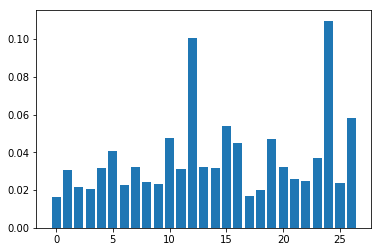

In [28]:
plt.bar(range(len(xgb_model.feature_importances_)), xgb_model.feature_importances_)

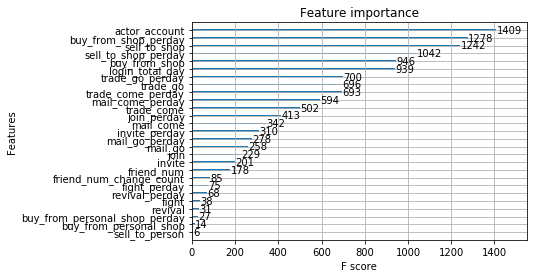

<Figure size 144000x7200 with 0 Axes>

In [29]:
from xgboost import plot_importance
from matplotlib import pyplot

plot_importance(xgb_model)
pyplot.figure(figsize=(2000,100))
pyplot.show()

In [30]:
Fi = xgb_model.feature_importances_

for i in range(0, len(x.columns)):
    print(x.columns[i],  Fi[i])

actor_account 0.016300607
trade_go 0.030465776
trade_come 0.021758659
buy_from_shop 0.020296488
sell_to_shop 0.031718977
buy_from_personal_shop 0.040579345
sell_to_person 0.022578262
mail_go 0.032000434
mail_come 0.024383266
invite 0.023464156
join 0.047399834
revival 0.030913366
fight 0.10037703
friend_num 0.032403957
friend_num_change_count 0.031550966
login_total_day 0.053742535
trade_go_perday 0.04507462
trade_come_perday 0.016615162
buy_from_shop_perday 0.019841824
sell_to_shop_perday 0.046838354
buy_from_personal_shop_perday 0.032460712
mail_go_perday 0.02605284
mail_come_perday 0.024890246
invite_perday 0.03675087
join_perday 0.109706484
revival_perday 0.023624567
fight_perday 0.058210738


Varables to exclude
1. buy_from_shop
2. by_from_personal_shop
3. buy_from_personal_shop_perday
4. mail_go_perday 
5. revival
6. revival perday
7. trade_come_perday

# Creating Final Training Data

In [31]:
v2e = ['buy_from_shop', 'buy_from_personal_shop', 'buy_from_personal_shop_perday', 'mail_go_perday', 'revival', 'revival_perday', 'trade_come_perday']

In [32]:
final_data = pd.DataFrame

In [33]:
# Through inspection of each columns
for i in v2e:
    del model_data[i]

In [34]:
final_data = model_data.copy()
final_data['class'] = y

In [37]:
final_data.head()

,actor_account,class,trade_go,trade_come,sell_to_shop,sell_to_person,mail_go,mail_come,invite,join,fight,friend_num,friend_num_change_count,login_total_day,trade_go_perday,buy_from_shop_perday,sell_to_shop_perday,mail_come_perday,invite_perday,join_perday,fight_perday
0,20000005.0,0.0,2.0,4.0,196.0,6.0,1.0,21.0,7.0,58.0,0.0,0.0,0.0,15.0,0.133333,4.800000,13.066667,1.400000,0.466667,3.866667,0.000000
1,20000016.0,0.0,1.0,0.0,111.0,1.0,0.0,56.0,16.0,35.0,0.0,0.0,0.0,14.0,0.071429,2.428571,7.928571,4.000000,1.142857,2.500000,0.000000
2,20000033.0,0.0,12.0,9.0,338.0,0.0,2.0,3.0,5.0,46.0,1.0,4.0,2.0,14.0,0.857143,2.214286,24.142857,0.214286,0.357143,3.285714,0.071429
3,20000035.0,0.0,111.0,37.0,504.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,15.0,7.400000,0.733333,33.600000,0.000000,0.000000,0.000000,0.000000
4,20000051.0,0.0,74.0,57.0,254.0,0.0,21.0,35.0,85.0,98.0,25.0,0.0,0.0,15.0,4.933333,4.533333,16.933333,2.333333,5.666667,6.533333,1.666667


In [36]:
final_data.to_csv('data_network_alpha.csv')